# This project applying the Newton's Method algorithm to estimate regression coefficient.

Import data and choosing depend and independ variable.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as stm

path = '../input/econometrics/collegehookup.csv'
data = pd.read_csv(path)

x = data[['Age','hookup_highschool','Gender','BMI','BMI2']]
x = stm.add_constant(x)
x = x.values
y = data['hookup_sum'].values
beta_list = [0.1,np.zeros([x.shape[1],1])]

Possion regression：
> Be appropriate when the dependent variable is a ***count***, for instance of events such as the arrival of a telephone call at a call centre. ***The events must be independent in the sense that the arrival of one call will not make another more or less likely***, but the probability per unit time of events is understood to be related to covariates such as time of day.

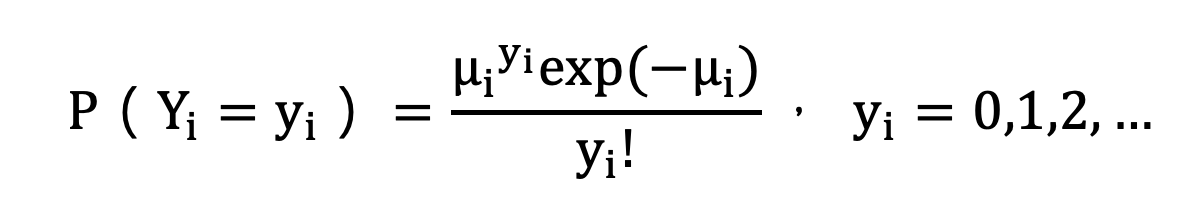



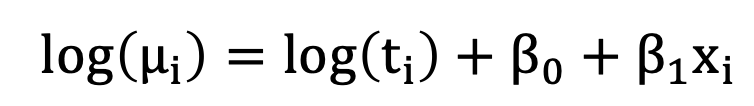

Where μ is average of occurrences per unit time

Define score function and hessian function

In [3]:
def S(x,y,beta):
    return x.reshape(-1,1)*(y-np.exp(x.reshape(1,-1).dot(beta)))

def H(x,beta):
    return -(x.reshape(-1,1).dot(x.reshape(1,-1)))*(np.exp(x.reshape(1,-1).dot(beta)))

Iterative numerical method

In [4]:
while abs(beta_list[-1]-beta_list[-2]).max() > 10**-4:
    score_function = np.zeros([x.shape[1],1])
    hessian_function = np.zeros([x.shape[1],x.shape[1]])
    for i in range(x.shape[0]):
        score_function += S(x[i],y[i],beta_list[-1])
        hessian_function += H(x[i],beta_list[-1]) 
    beta_list.append(beta_list[-1] - (np.linalg.inv(hessian_function).dot(score_function)))


Coefficient

In [5]:
print('constant:         ',beta_list[-1][0])
print('Age:              ',beta_list[-1][1])
print('hookup_highschool:',beta_list[-1][2])
print('Gender:           ',beta_list[-1][3])
print('BMI:              ',beta_list[-1][4])
print('BM2:              ',beta_list[-1][5])

constant:          [-5.79612206]
Age:               [0.00079792]
hookup_highschool: [0.03924774]
Gender:            [-0.10108682]
BMI:               [0.54820138]
BM2:               [-0.01032901]
